# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [147]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


In [148]:
import os
import pandas as pd

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Quick check
print("Rows, Columns:", df.shape)
print("\nMissing values:")
display(df[["lead_time", "adr"]].isna().sum())

Rows, Columns: (119390, 32)

Missing values:


,0
lead_time,0
adr,0


In [150]:
# Summary statistics
print("lead_time summary:")
display(df["lead_time"].describe())

lead_time summary:


,lead_time
count,119390.000000
mean,104.011416
std,106.863097
min,0.000000
25%,18.000000
50%,69.000000
75%,160.000000
max,737.000000


In [151]:
print("\nadr summary:")
display(df["adr"].describe())


adr summary:


,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


In [152]:
# Median + IQR
def median_iqr(s):
    q1, med, q3 = s.quantile([0.25, 0.50, 0.75])
    return pd.Series({"Q1": q1, "Median": med, "Q3": q3, "IQR": q3 - q1})

print("\nMedian + IQR:")
display(df[["lead_time", "adr"]].apply(median_iqr))


Median + IQR:


,lead_time,adr
Q1,18.0,69.290
Median,69.0,94.575
Q3,160.0,126.000
IQR,142.0,56.710


In [153]:
# Skewness
print("\nSkewness:")
display(df[["lead_time", "adr"]].skew(numeric_only=True))


Skewness:


,0
lead_time,1.346550
adr,10.530214


In [154]:
# Outliers (IQR rule)
def iqr_outliers(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return pd.Series({
        "lower_fence": lo, "upper_fence": hi,
        "outlier_count": ((s < lo) | (s > hi)).sum()
    })

iqr_summary = df[["lead_time", "adr"]].apply(iqr_outliers)

print("\nIQR outliers:")
display(iqr_summary)


IQR outliers:


,lead_time,adr
lower_fence,-195.0,-15.775
upper_fence,373.0,211.065
outlier_count,3005.0,3793.000


In [155]:
# ADR negative check:
# Data check: negative ADR may indicate adjustments/refunds

print("\nADR negatives:")
print("count:", (df["adr"] < 0).sum(), "| min:", df["adr"].min(), "| max:", df["adr"].max())


ADR negatives:
count: 1 | min: -6.38 | max: 5400.0


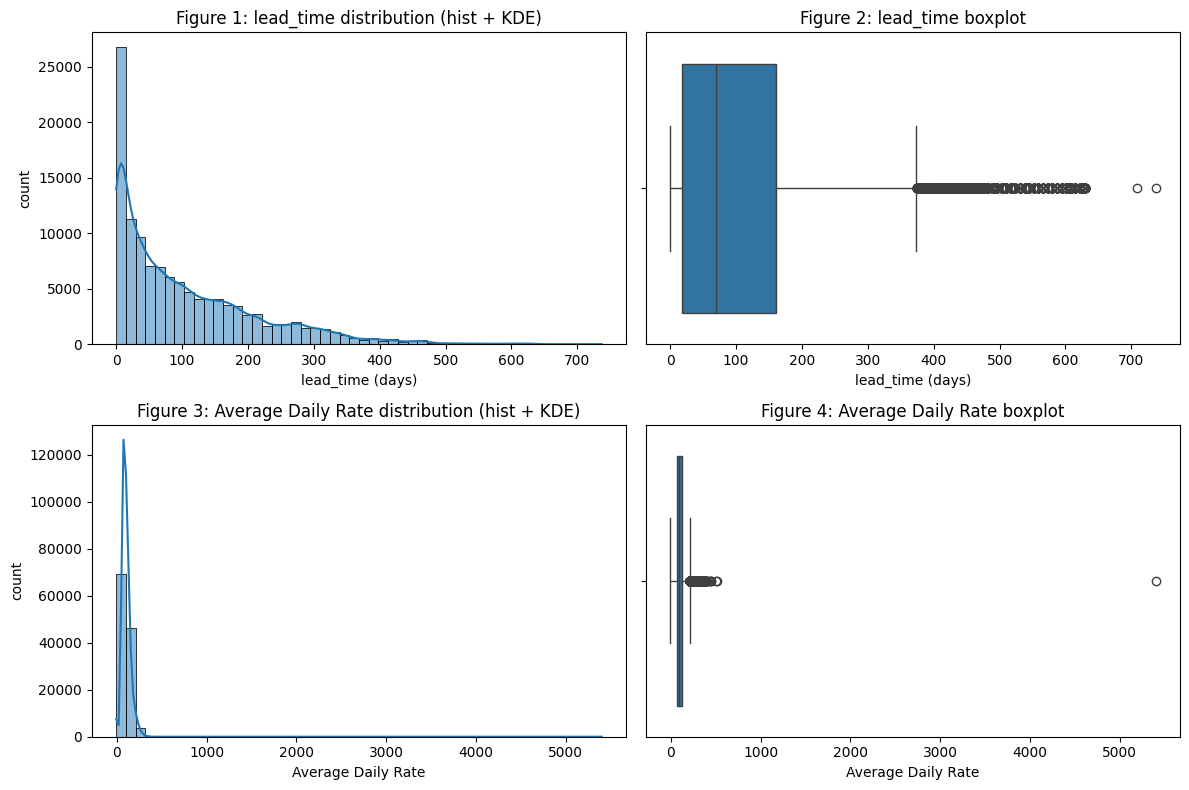

In [156]:
# Visualization: plots (hist + box)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df["lead_time"], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Figure 1: lead_time distribution (hist + KDE)")
axes[0, 0].set_xlabel("lead_time (days)")
axes[0, 0].set_ylabel("count")

sns.boxplot(x=df["lead_time"], ax=axes[0, 1])
axes[0, 1].set_title("Figure 2: lead_time boxplot")
axes[0, 1].set_xlabel("lead_time (days)")

sns.histplot(df["adr"], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Figure 3: Average Daily Rate distribution (hist + KDE)")
axes[1, 0].set_xlabel("Average Daily Rate")
axes[1, 0].set_ylabel("count")

sns.boxplot(x=df["adr"], ax=axes[1, 1])
axes[1, 1].set_title("Figure 4: Average Daily Rate boxplot")
axes[1, 1].set_xlabel("Average Daily Rate")

plt.tight_layout()
plt.show()


In [157]:
# Interpretation
print("\nInterpretation (Q1):")
print(f"- lead_time is right-skewed (skewness = {df['lead_time'].skew():.2f}); Figures 1–2 show a long right tail, and the IQR rule flags {int(iqr_summary.loc['outlier_count','lead_time'])} outliers.")
print(f"- Average Daily Rate (ADR) is strongly right-skewed (skewness = {df['adr'].skew():.2f}); Figures 3–4 show extreme high values, and the IQR rule flags {int(iqr_summary.loc['outlier_count','adr'])} outliers.")
print(f"- Negative ADR values are rare anomalies/adjustments: {int((df['adr'] < 0).sum())} case(s) (min ADR = {df['adr'].min():.2f}).")


Interpretation (Q1):
- lead_time is right-skewed (skewness = 1.35); Figures 1–2 show a long right tail, and the IQR rule flags 3005 outliers.
- Average Daily Rate (ADR) is strongly right-skewed (skewness = 10.53); Figures 3–4 show extreme high values, and the IQR rule flags 3793 outliers.
- Negative ADR values are rare anomalies/adjustments: 1 case(s) (min ADR = -6.38).


## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



In [158]:
print("Q2: lead_time by cancellation status (is_canceled)")

lead_stats = (
    # Split lead_time by canceled vs not canceled
    df.groupby("is_canceled")["lead_time"]
      .agg(
          n="size",
          mean="mean",
          median="median",
          std="std",
          q1=lambda s: s.quantile(0.25),
          q3=lambda s: s.quantile(0.75),
          min="min",
          max="max"
      )
      .reset_index()
)

lead_stats["iqr"] = lead_stats["q3"] - lead_stats["q1"]
lead_stats["status"] = lead_stats["is_canceled"].map({0:"Not canceled", 1:"Canceled"})

display(lead_stats[["status","n","mean","median","std","q1","q3","iqr","min","max"]])

# Handy differences for interpretation (canceled - not canceled)
mean_diff = (lead_stats.loc[lead_stats["is_canceled"] == 1, "mean"].iloc[0]
             - lead_stats.loc[lead_stats["is_canceled"] == 0, "mean"].iloc[0])

median_diff = (lead_stats.loc[lead_stats["is_canceled"] == 1, "median"].iloc[0]
               - lead_stats.loc[lead_stats["is_canceled"] == 0, "median"].iloc[0])

Q2: lead_time by cancellation status (is_canceled)


,status,n,mean,median,std,q1,q3,iqr,min,max
0,Not canceled,75166,79.984687,45.0,91.109888,9.0,124.0,115.0,0,737
1,Canceled,44224,144.848815,113.0,118.624829,48.0,214.0,166.0,0,629


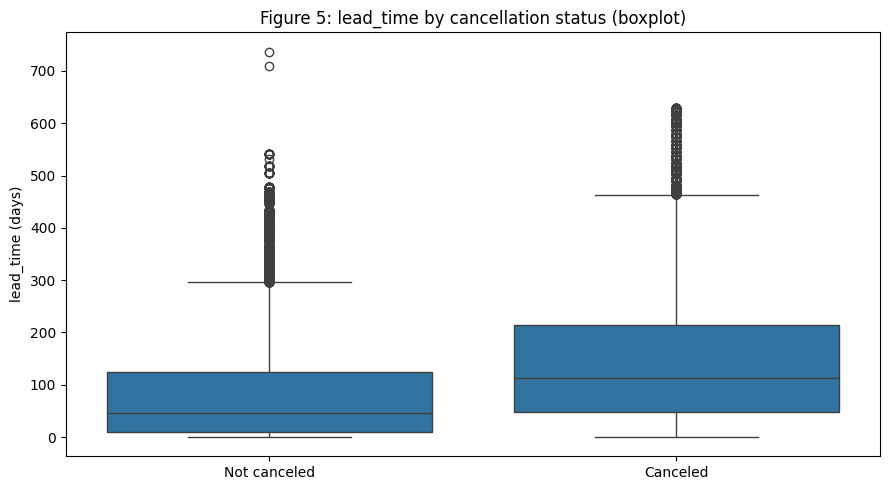

In [159]:
# Visualization:
# Figure 5: Boxplot (distribution comparison)

plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="is_canceled", y="lead_time")
plt.xticks([0,1], ["Not canceled", "Canceled"])
plt.title("Figure 5: lead_time by cancellation status (boxplot)")
plt.xlabel("")
plt.ylabel("lead_time (days)")
plt.tight_layout()
plt.show()

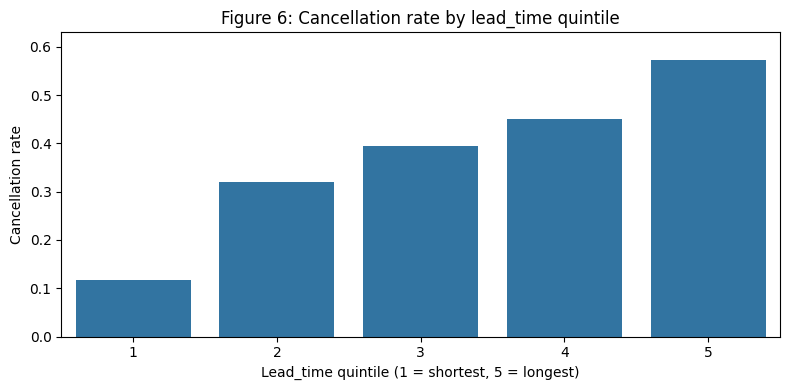

,lead_quintile,n,cancel_rate
0,1,23907,0.116577
1,2,24326,0.321015
2,3,23450,0.394542
3,4,23960,0.449833
4,5,23747,0.572620


In [160]:
# Figure 6: Let's split lead_time into 5 equal-count groups (quintiles), then plot the cancellation rate in each group.

df_bins = df[["lead_time", "is_canceled"]].dropna().copy()
# 5 equal-count bins (quintiles)
df_bins["lead_quintile"] = pd.qcut(df_bins["lead_time"], q=5, labels=[1,2,3,4,5])

cancel_rate = (
    df_bins.groupby("lead_quintile", observed=True)["is_canceled"]
    .agg(n="size", cancel_rate="mean")
    .reset_index()
)

plt.figure(figsize=(8,4))
sns.barplot(data=cancel_rate, x="lead_quintile", y="cancel_rate")
plt.title("Figure 6: Cancellation rate by lead_time quintile")
plt.xlabel("Lead_time quintile (1 = shortest, 5 = longest)")
plt.ylabel("Cancellation rate")
plt.ylim(0, min(1, cancel_rate["cancel_rate"].max() * 1.1))
plt.tight_layout()
plt.show()

display(cancel_rate)

In [161]:
# Interpretation

s0 = lead_stats.loc[lead_stats["is_canceled"] == 0].iloc[0]  # Not canceled
s1 = lead_stats.loc[lead_stats["is_canceled"] == 1].iloc[0]  # Canceled

first = cancel_rate.iloc[0]
last  = cancel_rate.iloc[-1]

interpretation_lines = [
    "Interpretation (Q2):",

    f"- Canceled bookings have longer lead times. Median lead_time: "
    f"{s1['median']:.1f} (canceled) vs {s0['median']:.1f} (not canceled) "
    f"(diff = {median_diff:.1f} days).",

    f"- Mean lead_time is also higher: {s1['mean']:.1f} vs {s0['mean']:.1f} "
    f"(diff = {mean_diff:.1f} days). Figure 5 shows the canceled group shifted upward.",

    f"- Figure 6 shows cancellation rate increases across lead_time quintiles: "
    f"{first['cancel_rate']:.3f} in quintile {int(first['lead_quintile'])} "
    f"to {last['cancel_rate']:.3f} in quintile {int(last['lead_quintile'])}."
]

print("\n" + "\n".join(interpretation_lines) + "\n")


Interpretation (Q2):
- Canceled bookings have longer lead times. Median lead_time: 113.0 (canceled) vs 45.0 (not canceled) (diff = 68.0 days).
- Mean lead_time is also higher: 144.8 vs 80.0 (diff = 64.9 days). Figure 5 shows the canceled group shifted upward.
- Figure 6 shows cancellation rate increases across lead_time quintiles: 0.117 in quintile 1 to 0.573 in quintile 5.



## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [162]:
# Define key columns for Q3
HOTEL_COL = "hotel"                  # H1=Resort, H2=City
MONTH_COL = "arrival_date_month"     # month of arrival
ADR_COL   = "adr"                    # Average Daily Rate

print("Q3: Seasonality & Pricing — ADR by arrival month and hotel type")

# Keep only needed columns and remove missing values
df_q3 = df[[HOTEL_COL, MONTH_COL, ADR_COL]].dropna().copy()
print("\nRows after dropping missing:", len(df_q3))


Q3: Seasonality & Pricing — ADR by arrival month and hotel type

Rows after dropping missing: 119390


In [163]:
df_q3["hotel_type"] = df_q3[HOTEL_COL].map({"H1": "Resort Hotel", "H2": "City Hotel"}).fillna(df_q3[HOTEL_COL])
df_q3["hotel_type"].value_counts()

,count
hotel_type,
City Hotel,79330
Resort Hotel,40060


In [164]:
# Turn it into a calendar order
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

df_q3[MONTH_COL] = pd.Categorical(df_q3[MONTH_COL], categories=month_order, ordered=True)

In [165]:
# Compute ADR summary stats by hotel type and arrival month
adr_month = (
    df_q3.groupby(["hotel_type", MONTH_COL], observed=True)[ADR_COL]
    .agg(n="size", mean_adr="mean", median_adr="median", std_adr="std")
    .reset_index()
    .sort_values(["hotel_type", MONTH_COL])
)

print("ADR summary table (month × hotel type):")
display(adr_month)

ADR summary table (month × hotel type):


,hotel_type,arrival_date_month,n,mean_adr,median_adr,std_adr
0,City Hotel,January,3736,82.628986,80.000,25.350968
1,City Hotel,February,4965,85.088278,80.000,28.781711
2,City Hotel,March,6458,92.643116,88.000,72.889867
3,City Hotel,April,7480,111.251838,105.000,36.128762
4,City Hotel,May,8232,121.638560,120.000,39.966153
5,City Hotel,June,7894,119.074341,117.370,36.084648
6,City Hotel,July,8088,110.734292,107.100,41.898966
7,City Hotel,August,8983,114.680455,109.000,45.974009
8,City Hotel,September,7400,110.004661,107.000,41.910098
9,City Hotel,October,7605,99.974498,99.870,33.815741


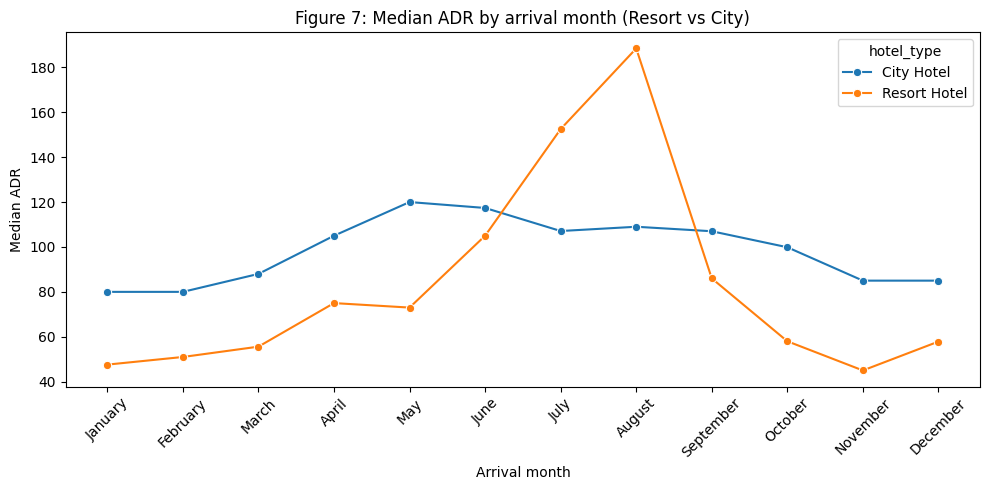

In [166]:
# Visualization:
# Plot seasonal ADR patterns

plt.figure(figsize=(10,5))
sns.lineplot(
    data=adr_month,
    x=MONTH_COL,
    y="median_adr",
    hue="hotel_type",
    marker="o"
)

plt.title("Figure 7: Median ADR by arrival month (Resort vs City)")
plt.xlabel("Arrival month")
plt.ylabel("Median ADR")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [167]:
# Calculate month-by-month MEDIAN ADR gap (Resort − City) and rank biggest differences
adr_pivot = (
    adr_month.pivot(index=MONTH_COL, columns="hotel_type", values="median_adr")
    .reset_index()
)

adr_pivot["adr_gap_resort_minus_city"] = adr_pivot["Resort Hotel"] - adr_pivot["City Hotel"]
adr_pivot["abs_gap"] = adr_pivot["adr_gap_resort_minus_city"].abs()

gap_rank = adr_pivot.sort_values("abs_gap", ascending=False)

print("Median ADR by month + Resort−City gap:")
display(gap_rank)

Median ADR by month + Resort−City gap:


hotel_type,arrival_date_month,City Hotel,Resort Hotel,adr_gap_resort_minus_city,abs_gap
7,August,109.00,188.420,79.420,79.420
4,May,120.00,73.000,-47.000,47.000
6,July,107.10,152.500,45.400,45.400
9,October,99.87,58.000,-41.870,41.870
10,November,85.00,45.000,-40.000,40.000
0,January,80.00,47.600,-32.400,32.400
2,March,88.00,55.600,-32.400,32.400
3,April,105.00,75.000,-30.000,30.000
1,February,80.00,51.000,-29.000,29.000
11,December,85.00,57.865,-27.135,27.135


In [168]:
print("Top 3 months with the largest absolute MEDIAN ADR gap:")
display(gap_rank.head(3))

Top 3 months with the largest absolute MEDIAN ADR gap:


hotel_type,arrival_date_month,City Hotel,Resort Hotel,adr_gap_resort_minus_city,abs_gap
7,August,109.0,188.42,79.42,79.42
4,May,120.0,73.00,-47.00,47.00
6,July,107.1,152.50,45.40,45.40


In [169]:
# Interpretation based on computed top-gap months

top3 = gap_rank.dropna(subset=["abs_gap"]).head(3)

interpretation_lines = [
    "Interpretation (Q3):",
    "- ADR changes across months for both hotel types, indicating seasonality.",
    "- Figure 7 compares the seasonal pricing patterns between Resort and City hotels.",
    "- Months with the most pronounced median ADR differences (largest absolute gaps): " +
    ", ".join([
        f"{row[MONTH_COL]} (Resort − City = {row['adr_gap_resort_minus_city']:.2f})"
        for _, row in top3.iterrows()
    ]) + ".",
    "- Positive gap means Resort is higher; negative gap means City is higher."
]

print("\n" + "\n".join(interpretation_lines) + "\n")


Interpretation (Q3):
- ADR changes across months for both hotel types, indicating seasonality.
- Figure 7 compares the seasonal pricing patterns between Resort and City hotels.
- Months with the most pronounced median ADR differences (largest absolute gaps): August (Resort − City = 79.42), May (Resort − City = -47.00), July (Resort − City = 45.40).
- Positive gap means Resort is higher; negative gap means City is higher.



## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


In [170]:
REPEAT_COL  = "is_repeated_guest"
CANCEL_COL  = "is_canceled"
LEAD_COL    = "lead_time"
CHANGE_COL  = "booking_changes"

df_q4 = df[[REPEAT_COL, CANCEL_COL, LEAD_COL, CHANGE_COL]].dropna().copy()
df_q4["guest_type"] = df_q4[REPEAT_COL].map({0: "First-time", 1: "Repeated"})

In [171]:
# Cancellation rate table
cancel_summary = (
    df_q4.groupby("guest_type", observed=True)[CANCEL_COL]
    .agg(n="size", canceled_rate="mean")
    .reset_index()
)
cancel_summary["canceled_rate_pct"] = (cancel_summary["canceled_rate"] * 100).round(2)

display(cancel_summary)

,guest_type,n,canceled_rate,canceled_rate_pct
0,First-time,115580,0.377851,37.79
1,Repeated,3810,0.144882,14.49


In [172]:
# Booking behavior summary table
behavior_summary = (
    df_q4.groupby("guest_type", observed=True)
    .agg(
        n=(CANCEL_COL, "size"),
        lead_mean=(LEAD_COL, "mean"),
        lead_median=(LEAD_COL, "median"),
        lead_std=(LEAD_COL, "std"),
        changes_mean=(CHANGE_COL, "mean"),
        changes_median=(CHANGE_COL, "median"),
        changes_std=(CHANGE_COL, "std"),
    )
    .reset_index()
)

for c in ["lead_mean","lead_median","lead_std","changes_mean","changes_median","changes_std"]:
    behavior_summary[c] = behavior_summary[c].round(2)

display(behavior_summary)

,guest_type,n,lead_mean,lead_median,lead_std,changes_mean,changes_median,changes_std
0,First-time,115580,106.43,72.0,106.94,0.22,0.0,0.65
1,Repeated,3810,30.79,3.0,73.41,0.26,0.0,0.66


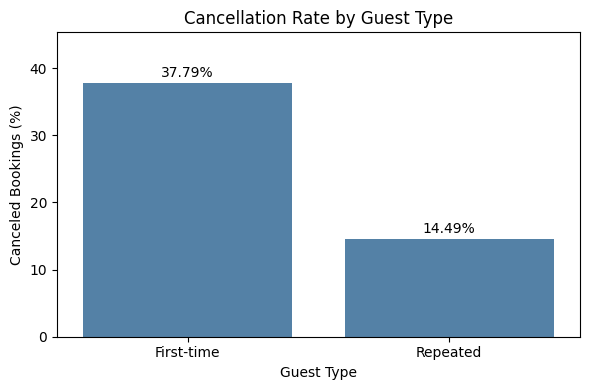

In [173]:
# Visualization
# 1: Cancellation rate bar chart
plt.figure(figsize=(6,4))
sns.barplot(data=cancel_summary, x="guest_type", y="canceled_rate_pct", color="steelblue")
plt.title("Cancellation Rate by Guest Type")
plt.xlabel("Guest Type")
plt.ylabel("Canceled Bookings (%)")
plt.ylim(0, cancel_summary["canceled_rate_pct"].max() * 1.2)

for i, v in enumerate(cancel_summary["canceled_rate_pct"]):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

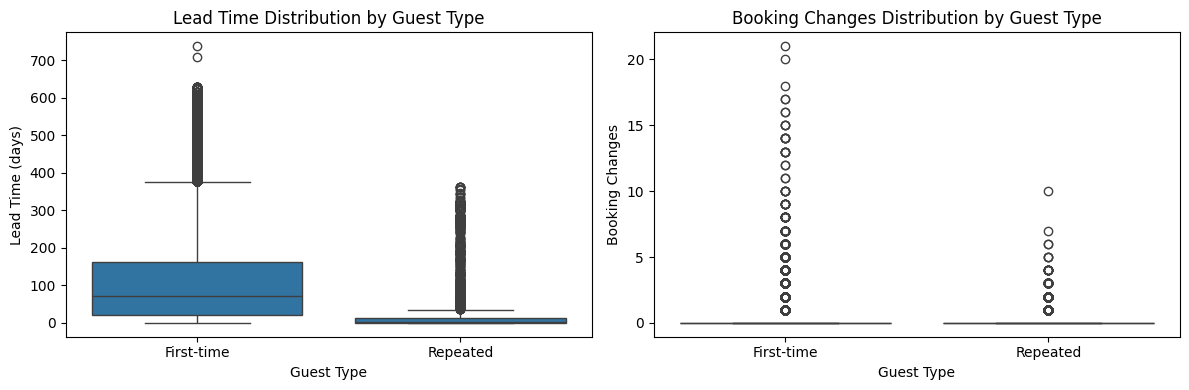

In [174]:
# Visualization 2: Booking behavior distributions (boxplots)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(data=df_q4, x="guest_type", y=LEAD_COL, ax=axes[0], showfliers=True)
axes[0].set_title("Lead Time Distribution by Guest Type")
axes[0].set_xlabel("Guest Type")
axes[0].set_ylabel("Lead Time (days)")

sns.boxplot(data=df_q4, x="guest_type", y=CHANGE_COL, ax=axes[1], showfliers=True)
axes[1].set_title("Booking Changes Distribution by Guest Type")
axes[1].set_xlabel("Guest Type")
axes[1].set_ylabel("Booking Changes")

plt.tight_layout()
plt.show()

In [175]:
# Interpretation helper (auto-populates numbers)
cs = cancel_summary.set_index("guest_type")["canceled_rate_pct"].to_dict()
bs = behavior_summary.set_index("guest_type").to_dict(orient="index")

interpretation_lines = [
    "Interpretation (Q4):",
    f"- Cancellation rate: First-time = {cs.get('First-time', np.nan):.2f}% vs Repeated = {cs.get('Repeated', np.nan):.2f}%.",
    f"- Lead time (median): First-time = {bs.get('First-time', {}).get('lead_median', np.nan):.2f} days vs Repeated = {bs.get('Repeated', {}).get('lead_median', np.nan):.2f} days.",
    f"- Booking changes (median): First-time = {bs.get('First-time', {}).get('changes_median', np.nan):.2f} vs Repeated = {bs.get('Repeated', {}).get('changes_median', np.nan):.2f}.",
    "- The boxplots show the spread and outliers, indicating whether either group has more variability or extreme cases.",
    "- Conclusion: decide which group behaves differently based on the direction and size of the differences above (especially cancellation rate)."
]

print("\n" + "\n".join(interpretation_lines) + "\n")


Interpretation (Q4):
- Cancellation rate: First-time = 37.79% vs Repeated = 14.49%.
- Lead time (median): First-time = 72.00 days vs Repeated = 3.00 days.
- Booking changes (median): First-time = 0.00 vs Repeated = 0.00.
- The boxplots show the spread and outliers, indicating whether either group has more variability or extreme cases.
- Conclusion: decide which group behaves differently based on the direction and size of the differences above (especially cancellation rate).



**Conclusion:** Repeated guests behave differently from first-time guests. They cancel far less often (14.49% vs 37.79%) and book much closer to arrival (median lead time 3 vs 72 days). Booking changes are similar overall (median 0 in both groups), so the biggest differences are cancellation behavior and lead time.

## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [176]:
CANCEL_COL  = "is_canceled"
LEAD_COL    = "lead_time"
DEPOSIT_COL = "deposit_type"
REPEAT_COL  = "is_repeated_guest"

# Minimum group sizes (lower these if plots/tables get too empty)
MIN_N_3V = 200
MIN_N_2V = 200

# Keep only the columns we need for Q5 and drop missing rows
df_q5 = df[[CANCEL_COL, LEAD_COL, DEPOSIT_COL, REPEAT_COL]].dropna().copy()

df_q5[DEPOSIT_COL] = df_q5[DEPOSIT_COL].astype(str).str.strip()

df_q5["guest_type"] = df_q5[REPEAT_COL].map({0: "First-time", 1: "Repeated"})

# Create lead time bins to make comparisons clearer
df_q5["lead_bin"] = pd.cut(
    df_q5[LEAD_COL],
    bins=[-1, 7, 30, 90, 180, 365, np.inf],
    labels=["0-7", "8-30", "31-90", "91-180", "181-365", "365+"]
)

overall = df_q5[CANCEL_COL].mean() * 100
print(f"Overall cancellation rate: {overall:.2f}%")

Overall cancellation rate: 37.04%


In [177]:
# Summary table: cancellation rate by (lead_bin x deposit_type x guest_type)
cancel_summary_3v = (
    df_q5.groupby(["lead_bin", DEPOSIT_COL, "guest_type"], observed=True)[CANCEL_COL]
    .agg(n="size", cancel_rate="mean")
    .reset_index()
)
cancel_summary_3v["cancel_rate_pct"] = (cancel_summary_3v["cancel_rate"] * 100).round(2)

display(cancel_summary_3v.sort_values("cancel_rate_pct", ascending=False).head(15))

,lead_bin,deposit_type,guest_type,n,cancel_rate,cancel_rate_pct
9,8-30,Non Refund,Repeated,39,1.000000,100.00
26,365+,Non Refund,First-time,1865,1.000000,100.00
23,181-365,Non Refund,First-time,5614,0.998575,99.86
14,31-90,Non Refund,First-time,2406,0.997922,99.79
18,91-180,Non Refund,First-time,4087,0.988989,98.90
8,8-30,Non Refund,First-time,455,0.962637,96.26
2,0-7,Non Refund,First-time,96,0.854167,85.42
3,0-7,Non Refund,Repeated,25,0.840000,84.00
22,181-365,No Deposit,Repeated,280,0.803571,80.36
15,31-90,Refundable,First-time,8,0.500000,50.00


In [178]:
# Filter to stable 3-variable groups (avoid tiny noise)
cancel_summary_3v_stable = cancel_summary_3v[cancel_summary_3v["n"] >= MIN_N_3V].copy()
display(cancel_summary_3v_stable.sort_values("cancel_rate_pct", ascending=False).head(15))

# Heatmap table: cancellation rate by (lead_bin x deposit_type) + counts
heat_base = (
    df_q5.groupby(["lead_bin", DEPOSIT_COL], observed=True)[CANCEL_COL]
    .agg(n="size", cancel_rate="mean")
    .reset_index()
)
heat_base["cancel_rate_pct"] = (heat_base["cancel_rate"] * 100).round(2)

,lead_bin,deposit_type,guest_type,n,cancel_rate,cancel_rate_pct
26,365+,Non Refund,First-time,1865,1.000000,100.00
23,181-365,Non Refund,First-time,5614,0.998575,99.86
14,31-90,Non Refund,First-time,2406,0.997922,99.79
18,91-180,Non Refund,First-time,4087,0.988989,98.90
8,8-30,Non Refund,First-time,455,0.962637,96.26
22,181-365,No Deposit,Repeated,280,0.803571,80.36
21,181-365,No Deposit,First-time,15625,0.390976,39.10
16,91-180,No Deposit,First-time,22156,0.349747,34.97
12,31-90,No Deposit,First-time,26916,0.322708,32.27
6,8-30,No Deposit,First-time,17836,0.265643,26.56


In [179]:
# Filter to stable heatmap cells
heat_base_stable = heat_base[heat_base["n"] >= MIN_N_2V].copy()

# Show stable heatmap cells (lead_bin x deposit_type) with counts
display(
    heat_base_stable.sort_values("cancel_rate_pct", ascending=False).head(10)
)

# Create heatmap matrix (lead_bin x deposit_type)
heat_pivot = heat_base_stable.pivot(
    index="lead_bin",
    columns=DEPOSIT_COL,
    values="cancel_rate_pct"
)

# Show the heatmap table (matches the heatmap plot)
display(heat_pivot.round(2))

,lead_bin,deposit_type,n,cancel_rate,cancel_rate_pct
16,365+,Non Refund,1865,1.000000,100.00
13,181-365,Non Refund,5614,0.998575,99.86
7,31-90,Non Refund,2406,0.997922,99.79
10,91-180,Non Refund,4087,0.988989,98.90
4,8-30,Non Refund,494,0.965587,96.56
12,181-365,No Deposit,15905,0.398240,39.82
9,91-180,No Deposit,22260,0.348607,34.86
6,31-90,No Deposit,27139,0.321898,32.19
3,8-30,No Deposit,18438,0.260440,26.04
15,365+,No Deposit,1280,0.206250,20.62


deposit_type,No Deposit,Non Refund
lead_bin,,
0-7,9.16,NaN
8-30,26.04,96.56
31-90,32.19,99.79
91-180,34.86,98.90
181-365,39.82,99.86
365+,20.62,100.00


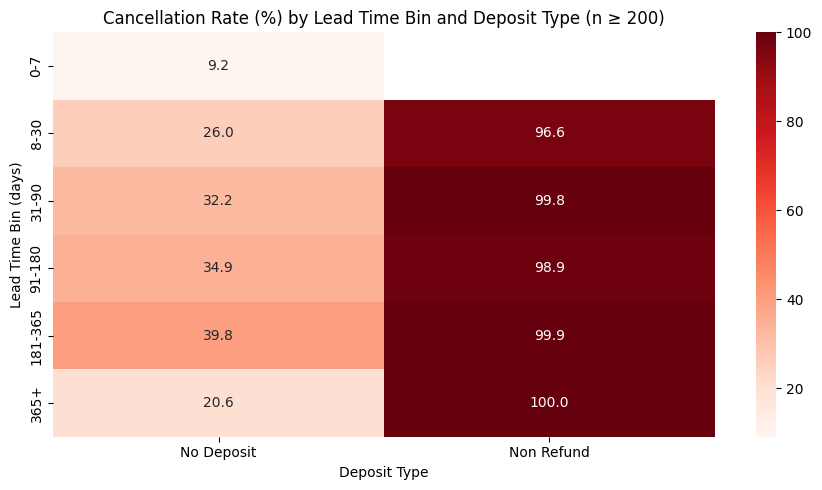

In [180]:
# Visualization
# 1: heatmap (lead_bin x deposit_type)
plt.figure(figsize=(9, 5))
sns.heatmap(heat_pivot, annot=True, fmt=".1f", cmap="Reds")
plt.title(f"Cancellation Rate (%) by Lead Time Bin and Deposit Type (n ≥ {MIN_N_2V})")
plt.xlabel("Deposit Type")
plt.ylabel("Lead Time Bin (days)")
plt.tight_layout()
plt.show()

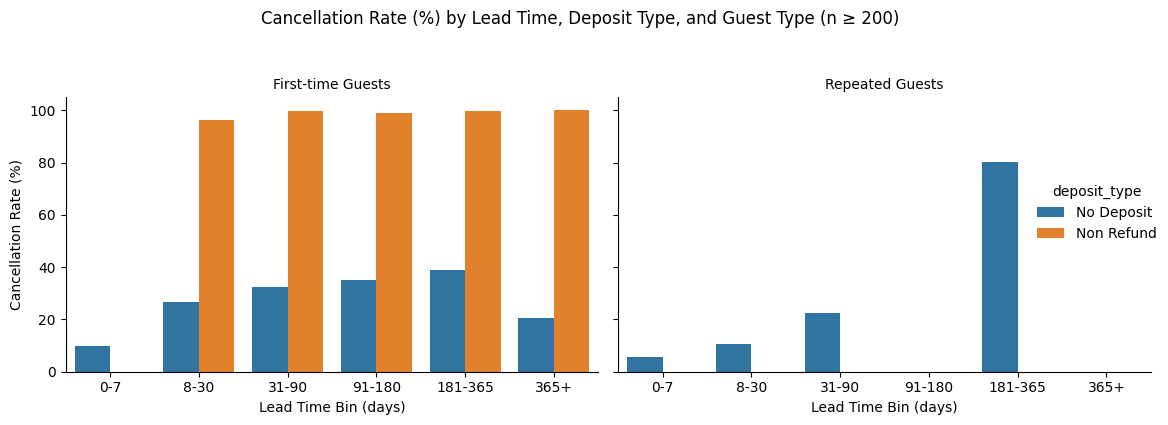

In [181]:
# Visualization
# 2: 3-variable interaction (faceted bars by guest_type)
g = sns.catplot(
    data=cancel_summary_3v_stable,
    x="lead_bin",
    y="cancel_rate_pct",
    hue=DEPOSIT_COL,
    col="guest_type",
    kind="bar",
    height=4,
    aspect=1.3
)
g.set_axis_labels("Lead Time Bin (days)", "Cancellation Rate (%)")
g.set_titles("{col_name} Guests")
g.fig.suptitle(
    f"Cancellation Rate (%) by Lead Time, Deposit Type, and Guest Type (n ≥ {MIN_N_3V})",
    y=1.05
)
plt.tight_layout()
plt.show()

In [182]:
best = heat_base_stable.sort_values("cancel_rate_pct").head(5)
worst = heat_base_stable.sort_values("cancel_rate_pct", ascending=False).head(5)

print("\nLowest cancellation combinations (Lead Bin x Deposit Type) [stable]:")
print(best[["lead_bin", DEPOSIT_COL, "n", "cancel_rate_pct"]].round(2).to_string(index=False))

print("\nHighest cancellation combinations (Lead Bin x Deposit Type) [stable]:")
print(worst[["lead_bin", DEPOSIT_COL, "n", "cancel_rate_pct"]].round(2).to_string(index=False))



Lowest cancellation combinations (Lead Bin x Deposit Type) [stable]:
lead_bin deposit_type     n  cancel_rate_pct
     0-7   No Deposit 19619             9.16
    365+   No Deposit  1280            20.62
    8-30   No Deposit 18438            26.04
   31-90   No Deposit 27139            32.19
  91-180   No Deposit 22260            34.86

Highest cancellation combinations (Lead Bin x Deposit Type) [stable]:
lead_bin deposit_type    n  cancel_rate_pct
    365+   Non Refund 1865           100.00
 181-365   Non Refund 5614            99.86
   31-90   Non Refund 2406            99.79
  91-180   Non Refund 4087            98.90
    8-30   Non Refund  494            96.56


In [183]:
# Interpretation helper (uses stable best/worst combos)
hi = worst.iloc[0].to_dict()
lo = best.iloc[0].to_dict()

interpretation_lines = [
    "Interpretation (Q5):",
    f"- Overall cancellation rate = {overall:.2f}%.",
    f"- Highest-risk stable combo (Lead Bin x Deposit Type): {hi['lead_bin']} + {hi[DEPOSIT_COL]} -> {hi['cancel_rate_pct']:.2f}% canceled (n={int(hi['n'])}).",
    f"- Lowest-risk stable combo (Lead Bin x Deposit Type): {lo['lead_bin']} + {lo[DEPOSIT_COL]} -> {lo['cancel_rate_pct']:.2f}% canceled (n={int(lo['n'])}).",
    "- Pattern: Cancellation varies strongly by lead time and deposit type.",
    "- Interaction: Deposit type changes how lead time relates to cancellations, and guest type adds more differences within the same segment."
]

print("\n" + "\n".join(interpretation_lines) + "\n")


Interpretation (Q5):
- Overall cancellation rate = 37.04%.
- Highest-risk stable combo (Lead Bin x Deposit Type): 365+ + Non Refund -> 100.00% canceled (n=1865).
- Lowest-risk stable combo (Lead Bin x Deposit Type): 0-7 + No Deposit -> 9.16% canceled (n=19619).
- Pattern: Cancellation varies strongly by lead time and deposit type.
- Interaction: Deposit type changes how lead time relates to cancellations, and guest type adds more differences within the same segment.

